# Phase-I Pixel detector: Efficiency measurements using the first collisions

The purpose of this notebook and presentation is to provide documentation and validation of the efficiency measurements.

<div style="margin-top: 20px; display: inline-block;"><a href="mailto:adam.hunyadi@cern.ch?Subject=Phase-I%20Pixel detector:%20Efficiency%20Measurements" target="_top">adam.hunyadi@cern.ch</div>
<div style="margin-left: 30px; margin-right: 30px; display: inline;">- - -</div>
<div style="display: inline;">2017. 05. 17.</div>

## Tools used
The PhaseIPixelNtuplizer package (used to process the CMSSW output) is available at:

https://github.com/jkarancs/PhaseIPixelNtuplizer

The PhaseIEfficiencyPlotter package (used to create plots) is available at:

https://github.com/hunyadix/PhaseIEfficiencyPlotter

In [1]:
import ROOT, sys
ROOT.gStyle.SetPalette(1)
sys.path.append('../python/')
inputFile = ROOT.TFile.Open("/data_ssd_120gb/hunyadi/CMSSW/PhaseIEfficiencyPlotter_2017_04_02/CMSSW_9_1_0_pre3/src/DPGAnalysis/PhaseIEfficiencyPlotter/histograms_test.root", "READ")

## Validation - List of delay scenarios
The Ntuple should contain plots listed in different directories. Each of these directories should correspont to a delay scenario. This code prints out the delay scenarios:


In [2]:
for key in ROOT.gDirectory.GetListOfKeys():
    print key.GetTitle()

Delay_4075.00
Delay_4000.00
Delay_4025.00
Delay_4125.00
Delay_3925.00
Efficiency_vs_delay


The delay scenarios should have been printed out ("Delay -9999.00" is saved for unknown delay scenarios or simulations). 

## Validation - list of plot types

In [3]:
mainDir = ROOT.gDirectory.Get("Efficiency_vs_delay/Graphs")
for index, directory in enumerate(mainDir.GetListOfKeys()): 
    sys.stdout.write("[ %s ] " % directory.GetTitle())

[ BpixFpix ] [ LayersNegativePositive ] [ DisksInnerOuter ] [ LayerDetailed ] 

## Validation - Plots

### Efficiency vs delay on the barrel and forward regions

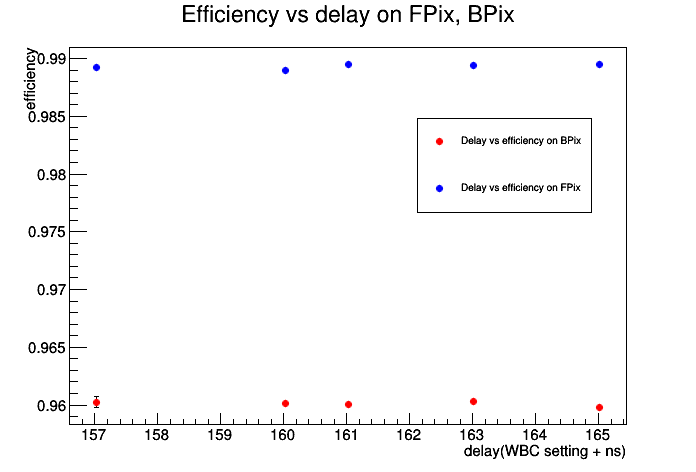

In [5]:
canvas = ROOT.TCanvas("FpixBpixCanvas")
graph = ROOT.TMultiGraph("FpixBpix", "Efficiency vs delay on FPix, BPix;delay(WBC setting + ns);efficiency")
graph.Add(mainDir.Get("BpixFpix").Get("delayVsEfficiencyBPixAsGraph"))
graph.Add(mainDir.Get("BpixFpix").Get("delayVsEfficiencyFPixAsGraph"))
graph.Draw("0AP")
canvas.BuildLegend(0.6, 0.55, 0.85, 0.75, "", "P")
canvas.Draw()

In [6]:
canvases = [None] * 2
canvases[0] = ROOT.TCanvas("LayersNegativeCanvas")
canvases[1] = ROOT.TCanvas("LayersPositiveCanvas")
graph_1 = ROOT.TMultiGraph("LayersNegative", 
    "Efficiency vs delay on layers - negative side;delay(WBC setting + ns);efficiency")
graph_2 = ROOT.TMultiGraph("LayersPositive", 
    "Efficiency vs delay on layers - positive side;delay(WBC setting + ns);efficiency")
graph_1.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer1NegativeAsGraph"))
graph_1.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer2NegativeAsGraph"))
graph_1.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer3NegativeAsGraph"))
graph_1.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer4NegativeAsGraph"))
graph_2.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer1PositiveAsGraph"))
graph_2.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer2PositiveAsGraph"))
graph_2.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer3PositiveAsGraph"))
graph_2.Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer4PositiveAsGraph"))
canvases[0].cd()
graph_1.Draw("0AP")
canvases[1].cd()
graph_2.Draw("0AP")
for canvas in canvases: canvas.BuildLegend(0.45, 0.45, 0.88, 0.70, "", "P")

<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

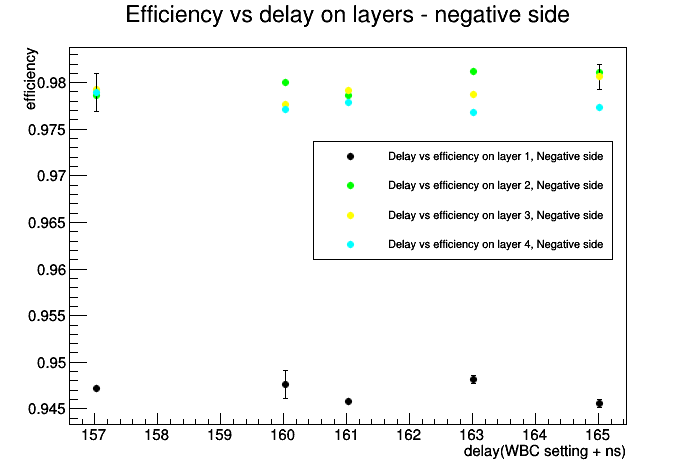

In [7]:
canvases[0].Draw()

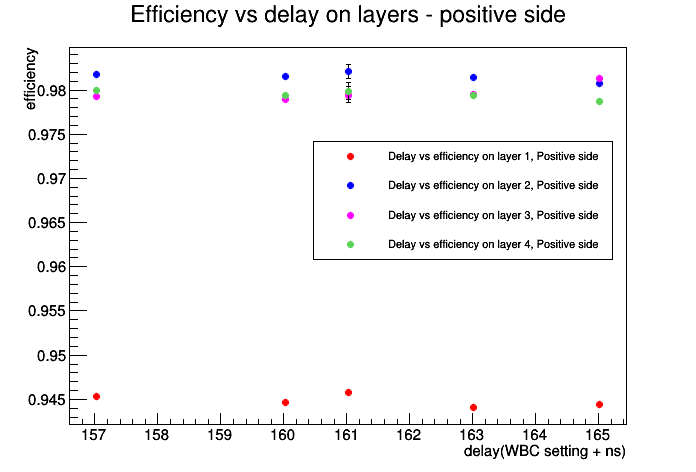

In [8]:
canvases[1].Draw()

In [9]:
canvases = [None] * 4
canvases[0] = ROOT.TCanvas("InnerRingsNegativeCanvas")
canvases[1] = ROOT.TCanvas("OuterRingsNegativeCanvas")
canvases[2] = ROOT.TCanvas("InnerRingsPositiveCanvas")
canvases[3] = ROOT.TCanvas("OuterRingsPositiveCanvas")
graph_1 = ROOT.TMultiGraph("InnerRingsNegative", 
    "Efficiency vs delay on inner rings - negative side;delay(WBC setting + ns);efficiency")
graph_2 = ROOT.TMultiGraph("OuterRingsNegative", 
    "Efficiency vs delay on outer rings - negative side;delay(WBC setting + ns);efficiency")
graph_3 = ROOT.TMultiGraph("InnerRingsPositive", 
    "Efficiency vs delay on inner rings - positive side;delay(WBC setting + ns);efficiency")
graph_4 = ROOT.TMultiGraph("OuterRingsPositive", 
    "Efficiency vs delay on outer rings - positive side;delay(WBC setting + ns);efficiency")
mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph").SetFillStyle(4)
mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph").SetFillColor(4)
graph_1.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph"))
graph_1.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2NegativeSideInnerRingAsGraph"))
graph_1.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3NegativeSideInnerRingAsGraph"))
graph_2.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideOuterRingAsGraph"))
graph_2.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2NegativeSideOuterRingAsGraph"))
graph_2.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3NegativeSideOuterRingAsGraph"))
graph_3.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1PositiveSideInnerRingAsGraph"))
graph_3.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2PositiveSideInnerRingAsGraph"))
graph_3.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3PositiveSideInnerRingAsGraph"))
graph_4.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1PositiveSideOuterRingAsGraph"))
graph_4.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2PositiveSideOuterRingAsGraph"))
graph_4.Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3PositiveSideOuterRingAsGraph"))
canvases[0].cd()
graph_1.Draw("0AP")
canvases[1].cd()
graph_2.Draw("0AP")
canvases[2].cd()
graph_3.Draw("0AP")
canvases[3].cd()
graph_4.Draw("0AP")
for canvas in canvases: canvas.BuildLegend(0.45, 0.68, 0.88, 0.88, "", "P")

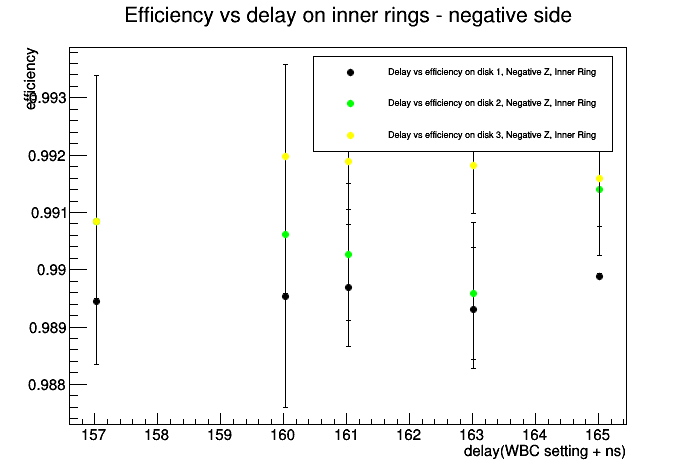

In [10]:
canvases[0].Draw()

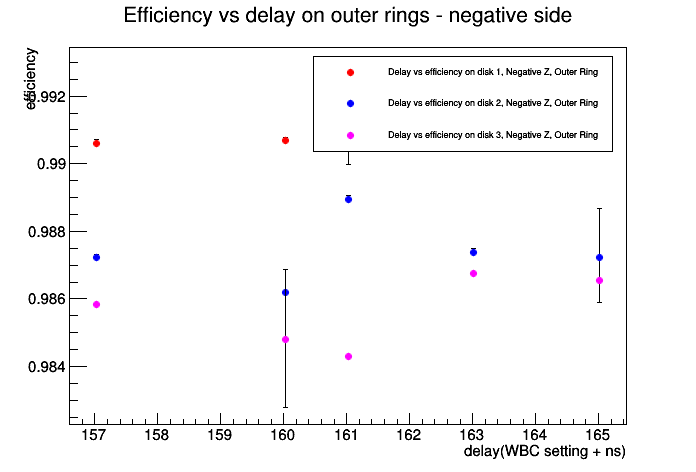

In [11]:
canvases[1].Draw()

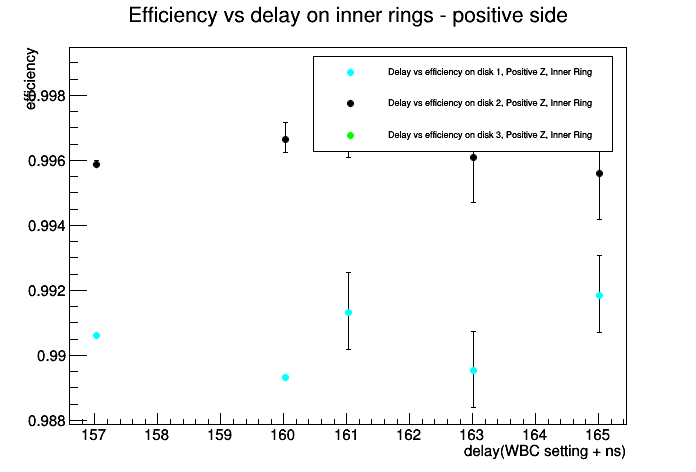

In [12]:
canvases[2].Draw()

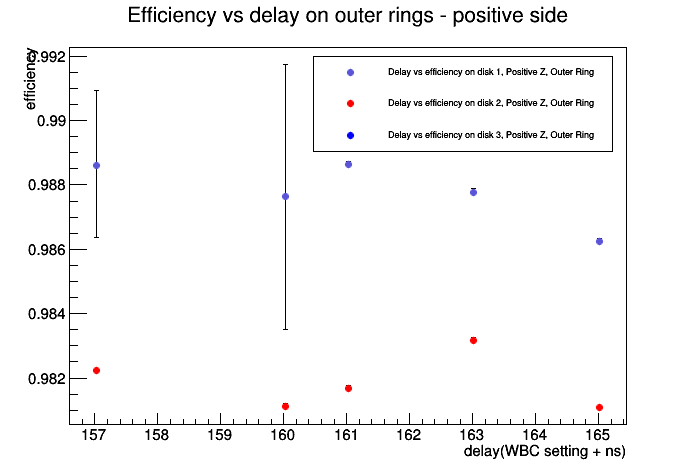

In [13]:
canvases[3].Draw()

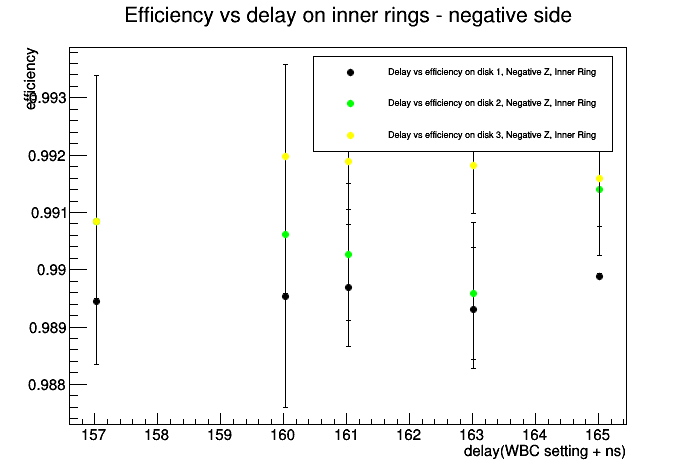

In [14]:
canvases[0].Draw()

In [15]:
canvases              = [None] * 8
graphs                = [None] * 8
sideStrings           = ["Negative", "Positive"]
layerPairStrings      = ["1 and 2", "3 and 4"]
layerPairStringsShort = ["1and2", "3and4"]
for index in range(64):
    side                   = index / 32
    halfShell              = (index - side * 32) / 16
    layerPair              = (index - side * 32 - halfShell * 16) / 8
    sec                    = index % 8
    sideAsString           = sideStrings[side]
    secAsString            = str(sec + 1)
    halfShellAsString      = sideStrings[halfShell]
    layerPairAsString      = layerPairStrings[layerPair]
    layerPairAsShortString = layerPairStringsShort[layerPair]
    graphIndex             = side * 4 + halfShell * 2 + layerPair
    if sec == 0: 
        canvases[graphIndex] = ROOT.TCanvas(sideAsString.lower() + "Z" + halfShellAsString + "XShellLayers" + layerPairAsShortString + "canvas")
        graphs[graphIndex]   = ROOT.TMultiGraph(sideAsString.lower() + "Z" + halfShellAsString + "Layers" + layerPairAsShortString, 
            "Efficiency vs delay on sectors - " + sideAsString.lower() + " Z, " + halfShellAsString.lower() + " X shell, layers " + layerPairAsString + ";delay(WBC setting + ns);efficiency")
    graphs[graphIndex].Add(mainDir.Get("LayerDetailed").Get("delayVsEfficiency" + sideAsString + "Z" + halfShellAsString + "XShellSector" + secAsString + "Layers" + layerPairAsShortString + "AsGraph"))
for graphIndex in range(len(graphs)):
    canvases[graphIndex].cd()
    graphs[graphIndex].Draw("0AP")
    canvases[graphIndex].BuildLegend(0.45, 0.48, 0.88, 0.88, "", "P")

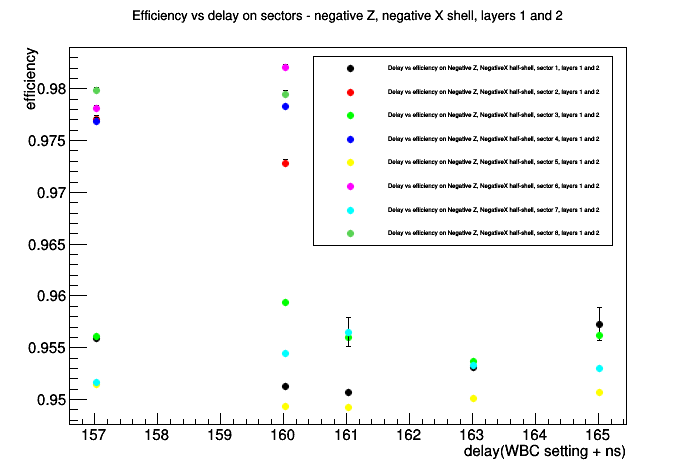

In [16]:
canvases[0].Draw()

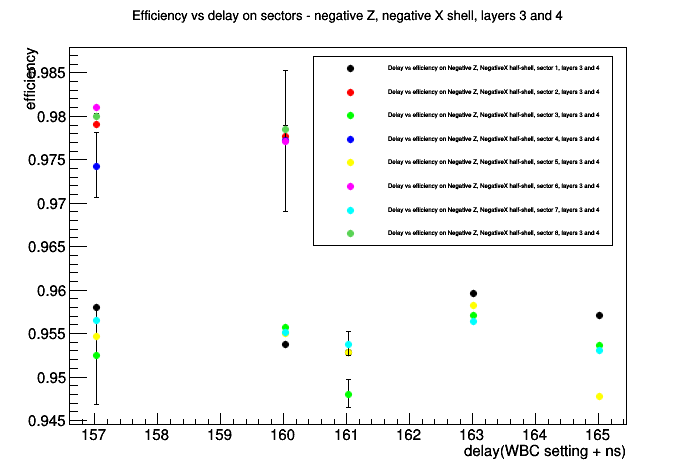

In [17]:
canvases[1].Draw()

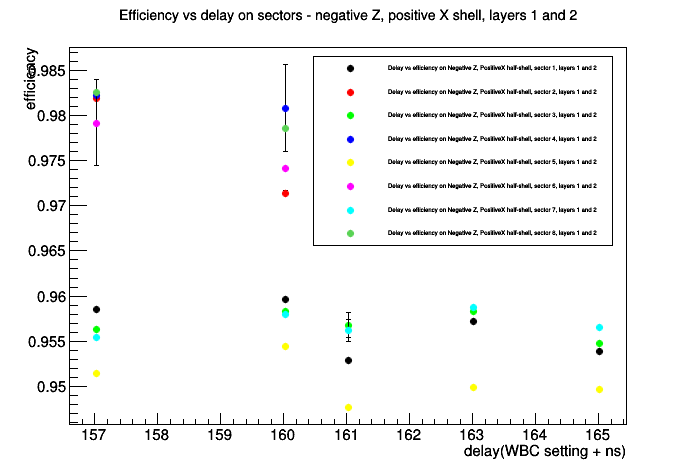

In [18]:
canvases[2].Draw()

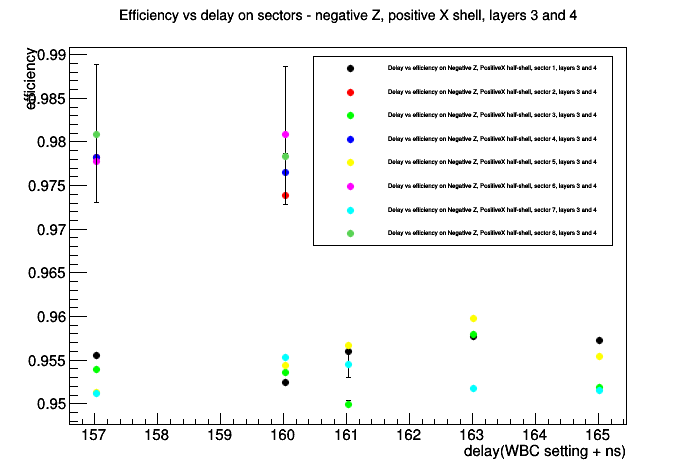

In [19]:
canvases[3].Draw()

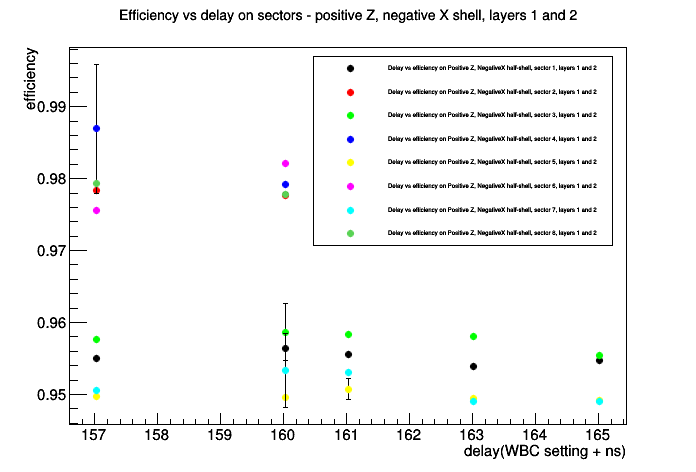

In [20]:
canvases[4].Draw()

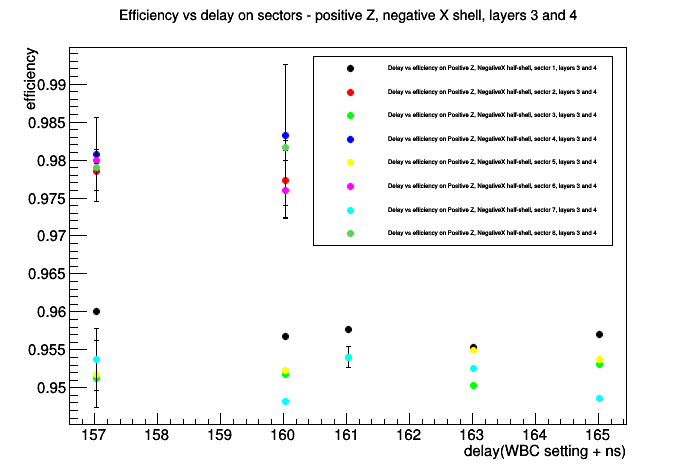

In [21]:
canvases[5].Draw()

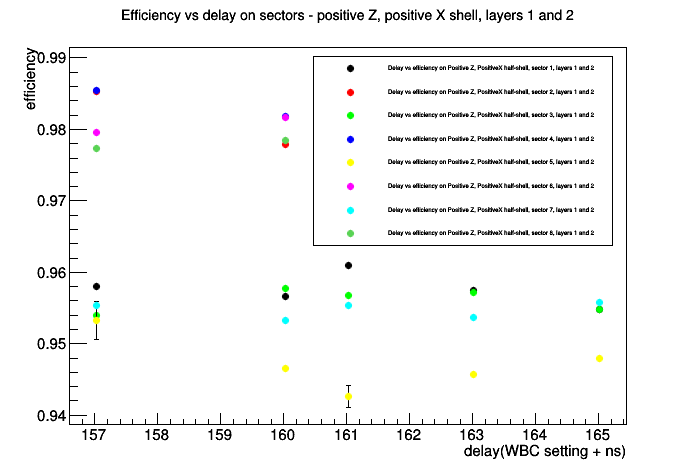

In [22]:
canvases[6].Draw()

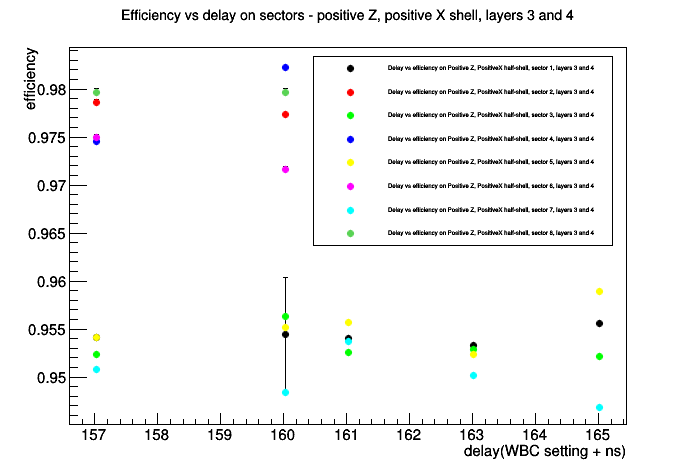

In [23]:
canvases[7].Draw()

In [26]:
a = 2

It is {{a}}